<a href="https://colab.research.google.com/github/ahmned3234/CodeAlpha_DataAnalytics_internship/blob/main/Code_Alpha%20%26%20Task%202%20%26%20Task%203%20%7C%20EDA%20%26%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
lainguyn123_student_performance_factors_path = kagglehub.dataset_download('lainguyn123/student-performance-factors')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Exploratory Data Analysis (Task 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [ ]:
df["Teacher_Quality"].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [ ]:
df["Parental_Education_Level"].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [ ]:
df["Distance_from_Home"].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

# Cleaning Anomalies

In [ ]:
df.fillna({
    'Teacher_Quality' : df["Teacher_Quality"].mode()[0],
    'Parental_Education_Level' : df["Parental_Education_Level"].mode()[0],
    'Distance_from_Home' : df["Distance_from_Home"].mode()[0]
},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Outliers & Anomly Detection

In [ ]:
numerical_cols = df.select_dtypes(include = "number")
numerical_cols

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


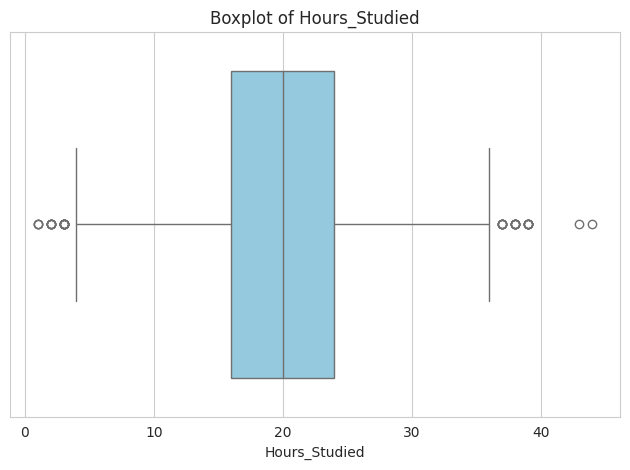

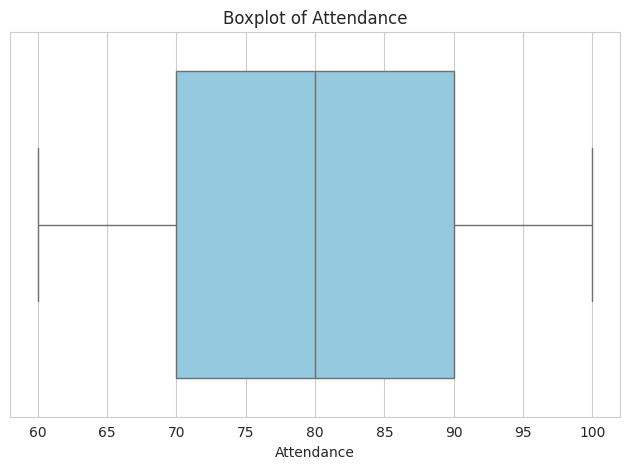

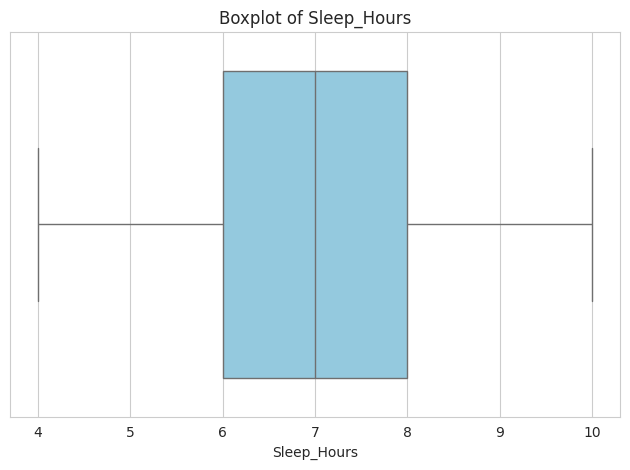

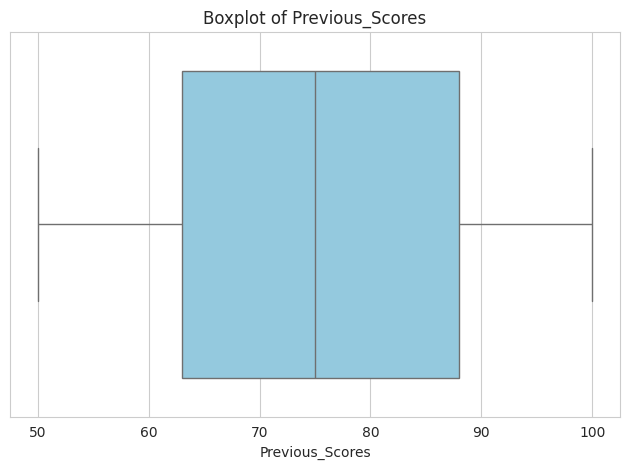

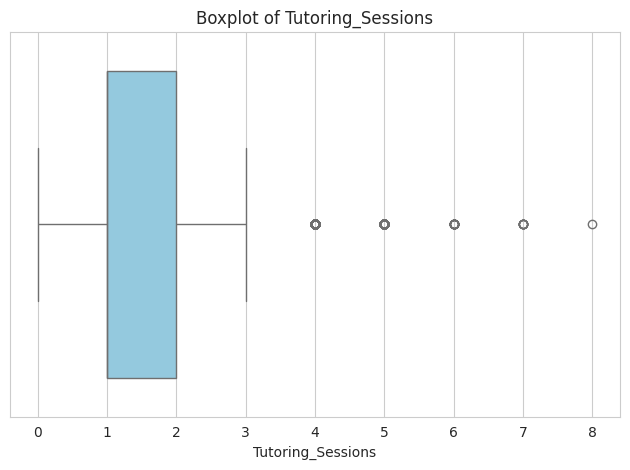

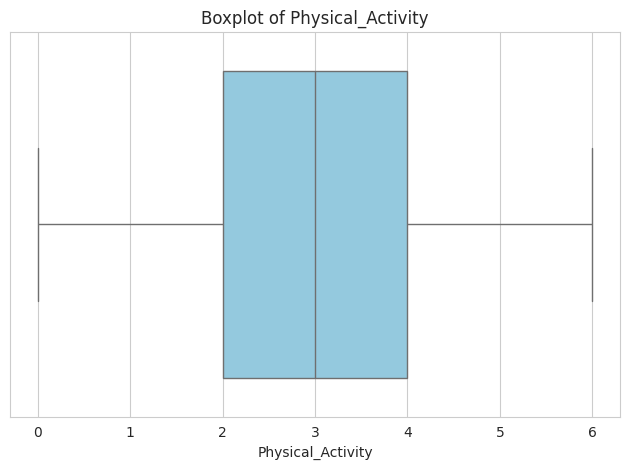

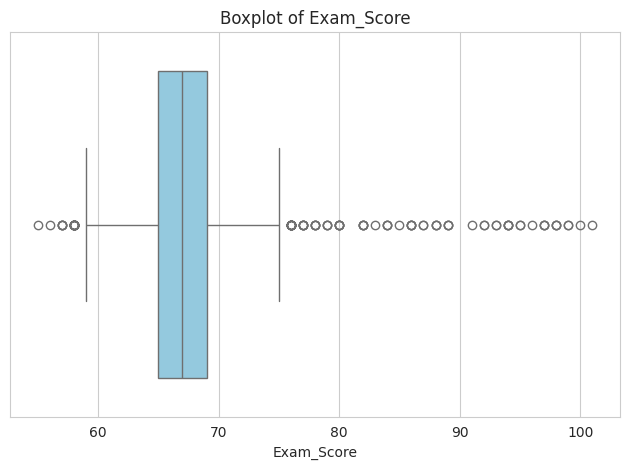

In [ ]:
for col in numerical_cols.columns :
    sns.boxplot(x=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

 # Removing Outliers

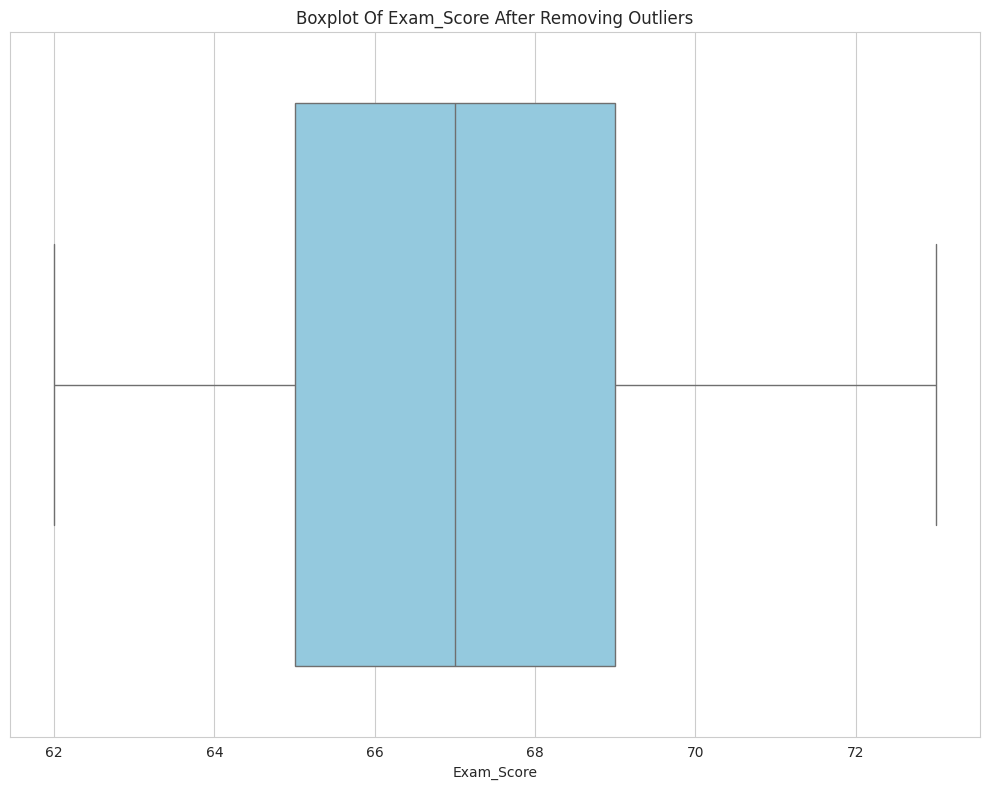

In [ ]:
for col in numerical_cols.columns :
        lower_limit = df[col].quantile(0.05)
        upper_limit = df[col].quantile(0.95)
        df[col] = np.clip(df[col],lower_limit,upper_limit)

plt.figure(figsize = (10,8))
sns.boxplot(x=df['Exam_Score'],color = 'skyblue')
plt.title(f'Boxplot Of Exam_Score After Removing Outliers')
plt.xlabel('Exam_Score')
plt.tight_layout()
plt.show()

# Data Visualisation (Task 3)

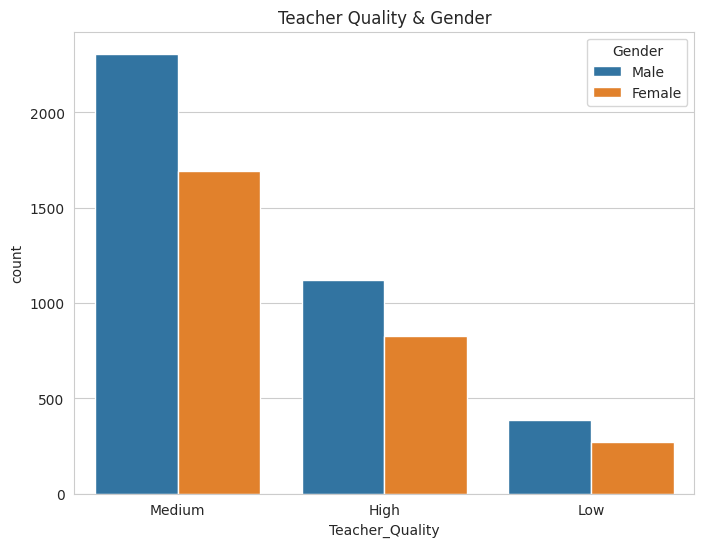

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df,x='Teacher_Quality',hue="Gender")
plt.title("Teacher Quality & Gender")
plt.show()

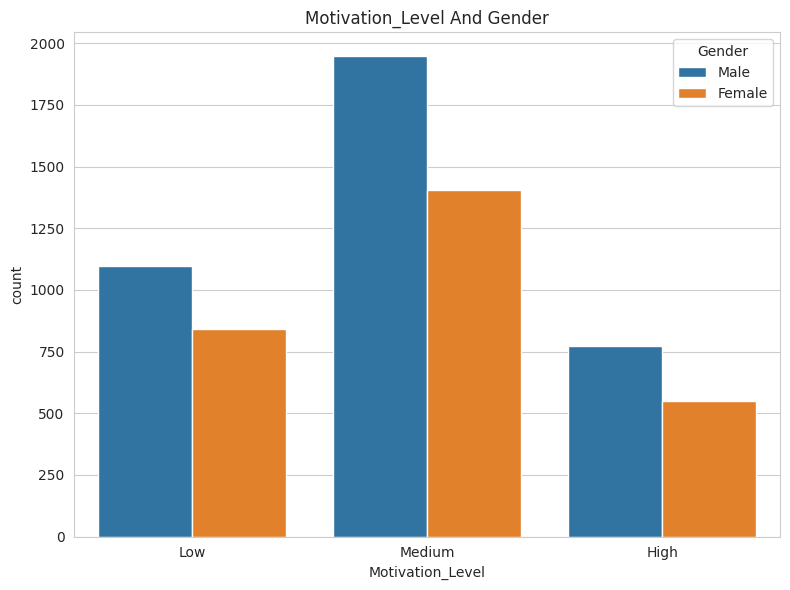

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df,x='Motivation_Level',hue='Gender')
plt.title("Motivation_Level And Gender")
plt.xlabel='Motivation Level'
plt.ylabel='Motivation Degree'
plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter(df,x="Hours_Studied",y="Exam_Score",color="Gender",title="Exam Scores by Hours Studied")
fig.show()

In [ ]:
study_time_high_scores = df.groupby('Hours_Studied')['Exam_Score'].mean().to_frame().reset_index().sort_values(ascending=False,by="Exam_Score")
study_time_high_scores

,Hours_Studied,Exam_Score
20,30,70.377660
19,29,69.888060
18,28,69.216374
17,27,69.196507
15,25,68.525952
16,26,68.520913
13,23,68.097324
14,24,68.044818
11,21,67.501160
12,22,67.412935


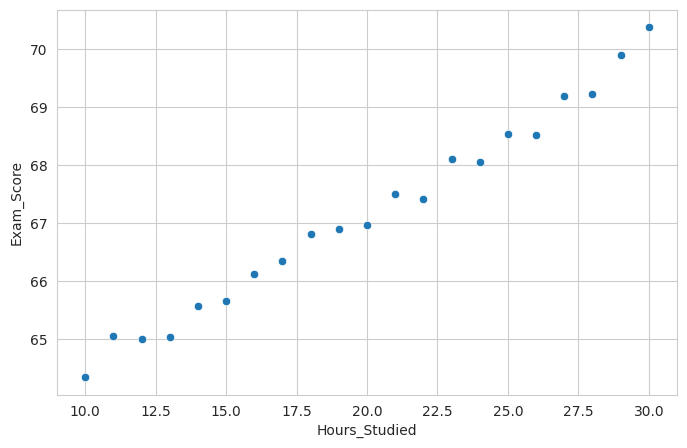

In [ ]:
plt.figure(figsize = (8,5))
sns.scatterplot(study_time_high_scores,x='Hours_Studied',y='Exam_Score',)
plt.show()

In [ ]:
df.Sleep_Hours.min()

5

In [ ]:
df['Sleep_Category'] = df['Sleep_Hours'].apply(lambda x : 'Low Sleep' if x < 6 else 'Healthy Sleep')
df['Attendance_Category'] = df['Attendance'].apply(lambda x : 'Poor Attendance' if x < 70 else 'Good Attendance')

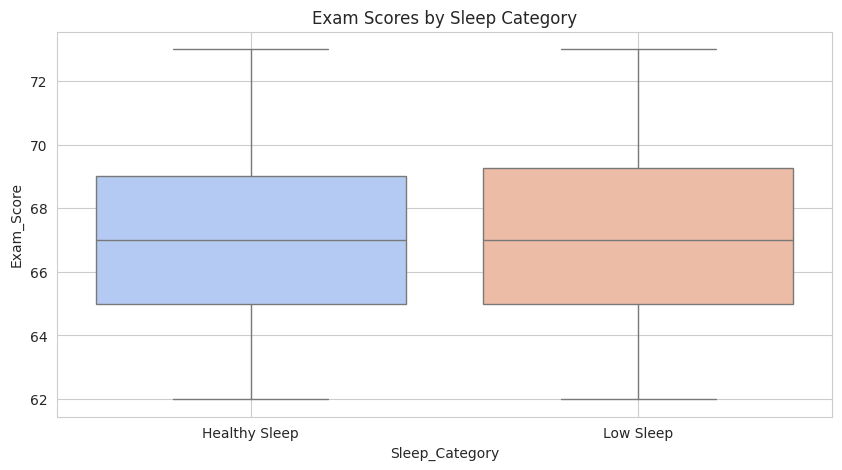

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sleep_Category', y='Exam_Score', data=df, palette='coolwarm')
plt.title("Exam Scores by Sleep Category")
plt.ylabe = "Exam Score"
plt.xlabel = "Sleep Level"
plt.grid(True)
plt.show()

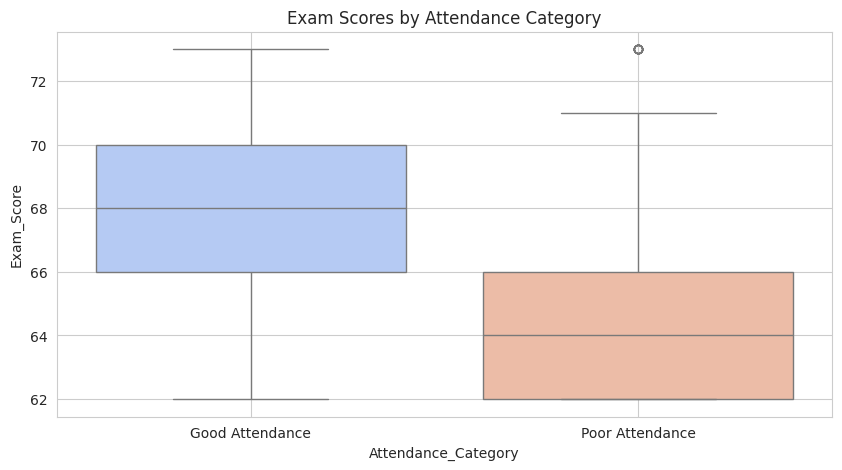

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x='Attendance_Category', y='Exam_Score', data=df, palette='coolwarm')
plt.title("Exam Scores by Attendance Category")
plt.ylabe = "Exam Score"
plt.xlabel = "Attendance Level"
plt.grid(True)
plt.show()

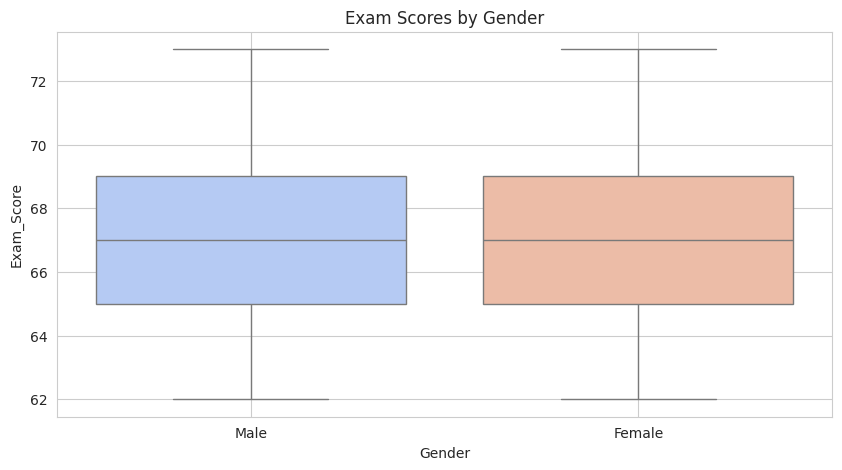

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x='Gender', y='Exam_Score', data=df, palette='coolwarm')
plt.title("Exam Scores by Gender")
plt.ylabe = "Exam Score"
plt.xlabel = "Gender"
plt.grid(True)
plt.show()

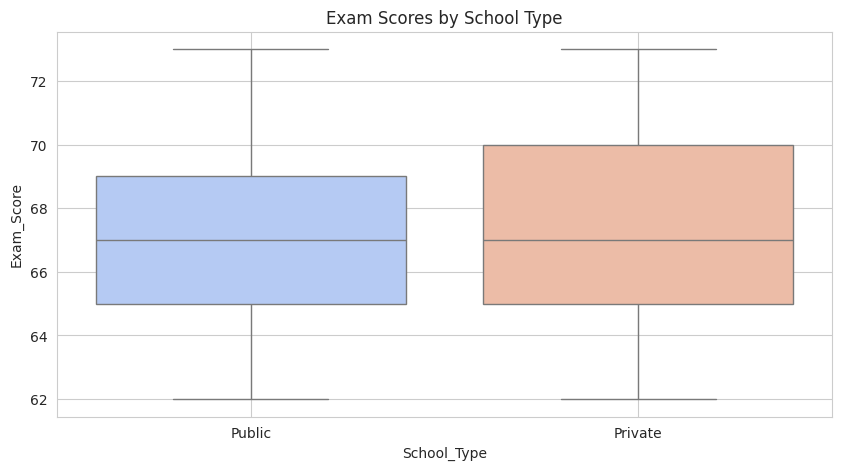

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x='School_Type', y='Exam_Score', data=df, palette='coolwarm')
plt.title("Exam Scores by School Type")
plt.ylabe = "Exam Score"
plt.xlabel = "School Type"
plt.grid(True)
plt.show()

In [ ]:
average_scores = df.groupby('Tutoring_Sessions')['Exam_Score'].mean().to_frame().reset_index().sort_values(ascending=True,by="Exam_Score")
average_scores

,Tutoring_Sessions,Exam_Score
0,0,66.518176
1,1,66.909592
2,2,67.431777
3,3,67.771531
4,4,68.358140


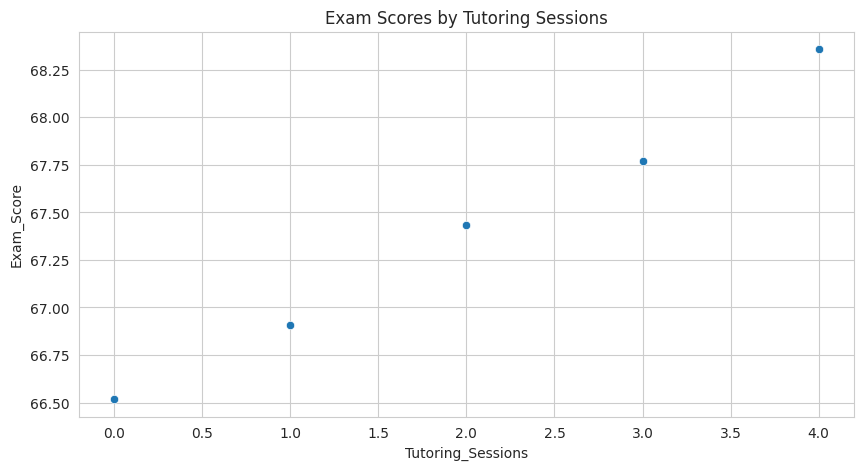

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=average_scores, palette='coolwarm')
plt.title("Exam Scores by Tutoring Sessions")
plt.ylabe = "Exam Score"
plt.xlabel = "Tutoring Sessions Levels"
plt.grid(True)
plt.show()

In [ ]:
Distance_Attendance = df.groupby("Distance_from_Home")["Attendance"].sum().to_frame().reset_index().sort_values(ascending=True,by="Distance_from_Home")
Distance_Attendance['Distance_from_Home']

,Distance_from_Home
0,Far
1,Moderate
2,Near


In [ ]:
fig = px.bar(df,x=Distance_Attendance['Distance_from_Home'],y=Distance_Attendance["Attendance"],title="Distance_from_Home & Attendance"
            ,labels={'x' : 'Distance_from_home','y' : 'Attendance'})
fig.show()

In [ ]:
sleep_hour_counts = df['Sleep_Hours'].value_counts()
fig = px.bar(df,x=sleep_hour_counts.index,y=sleep_hour_counts.values,title="Sleep Hours Distribution"
              ,labels={'x' : 'Sleep_Hours','y' : 'Count'})
fig.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df["School_Type"].unique()

array(['Public', 'Private'], dtype=object)

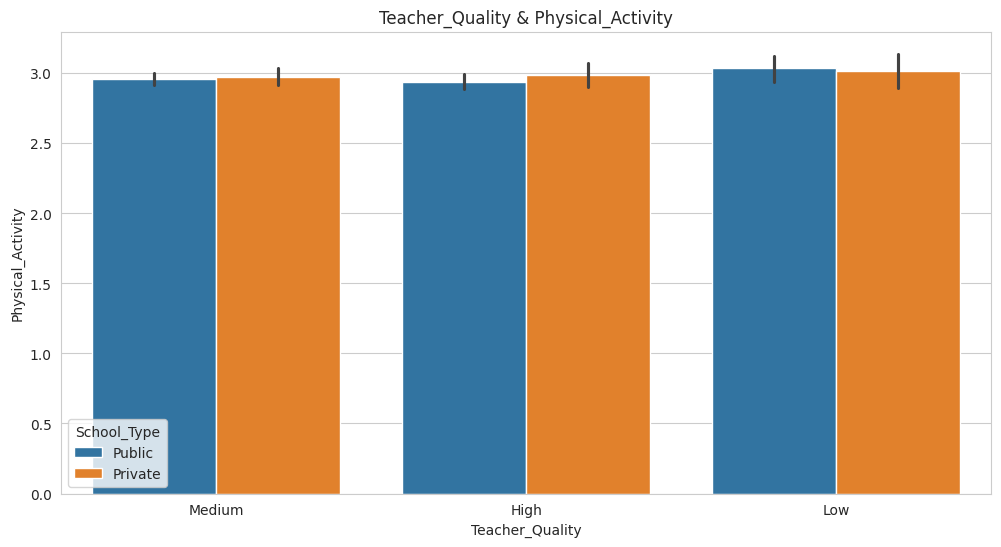

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(df,x="Teacher_Quality",y="Physical_Activity",hue="School_Type")
plt.title("Teacher_Quality & Physical_Activity")
plt.show()

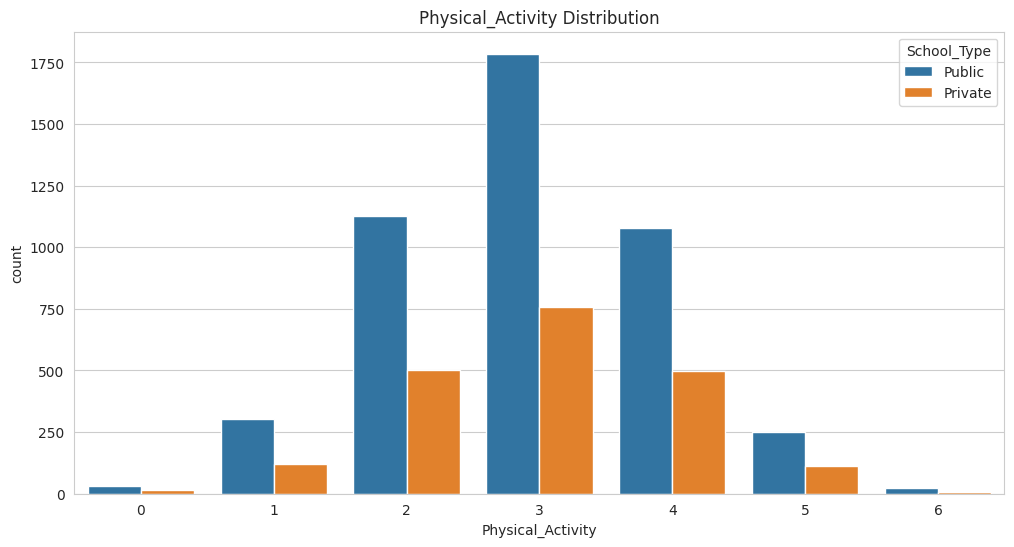

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df,x="Physical_Activity",hue="School_Type")
plt.title("Physical_Activity Distribution")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
Internet_attendance = df.groupby("Internet_Access")["Attendance"].sum().to_frame().reset_index().sort_values(ascending = False,by = 'Attendance')
Internet_attendance

,Internet_Access,Attendance
1,Yes,488133
0,No,40278


In [ ]:
fig = px.bar(df,x=Internet_attendance["Internet_Access"],y=Internet_attendance["Attendance"],color=Internet_attendance["Internet_Access"]
             ,labels={'x' : 'Internet_Access','y' : 'Total_Attendance'},title="Total_Attendance by Internet_Access")
fig.show()

Text(0.5, 1.0, 'Tutoring_Sessions Distribution')

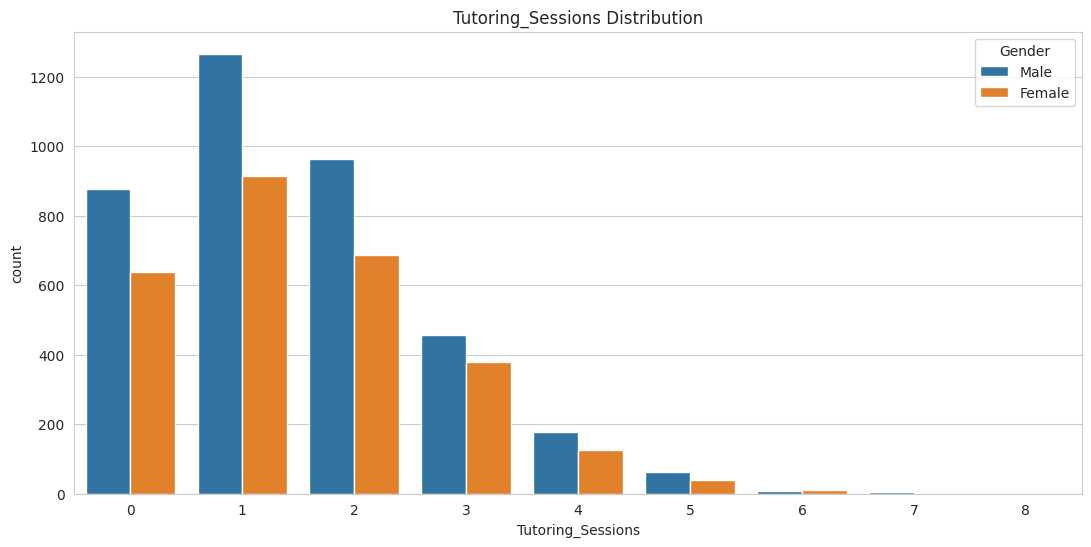

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(df,x='Tutoring_Sessions',hue="Gender")
plt.title("Tutoring_Sessions Distribution")

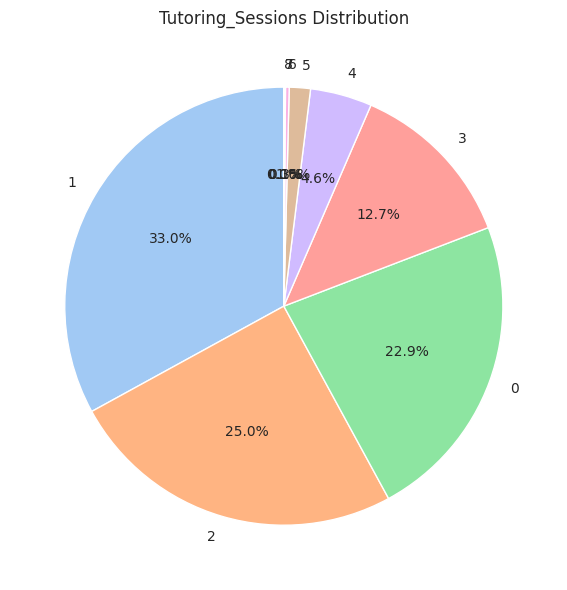

In [ ]:
Tutoring_sessions_counts = df["Tutoring_Sessions"].value_counts()
values = Tutoring_sessions_counts.values
labels = Tutoring_sessions_counts.index.tolist()
plt.figure(figsize=(8,6))
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title("Tutoring_Sessions Distribution")
plt.tight_layout()
plt.show()

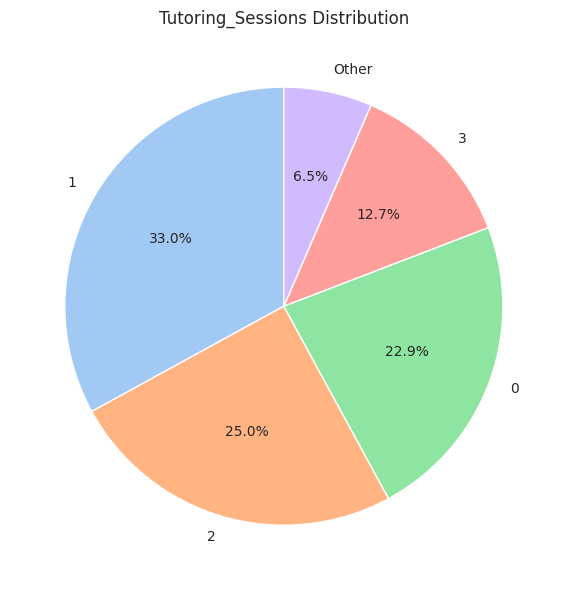

In [ ]:
high_tutoring_sessions = Tutoring_sessions_counts[:-5]
low_tutoring_sessions = Tutoring_sessions_counts[-5:].sum()
high_tutoring_sessions["Other"] = low_tutoring_sessions
labels = high_tutoring_sessions.index
values = high_tutoring_sessions.values
plt.figure(figsize=(8,6))
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title("Tutoring_Sessions Distribution")
plt.tight_layout()
plt.show()

In [ ]:
df['Family_Income'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
family_income_count = df.groupby("Family_Income")["Exam_Score"].mean().to_frame().reset_index().sort_values(ascending = False,by = 'Exam_Score')
family_income_count

,Family_Income,Exam_Score
0,High,67.842396
2,Medium,67.334959
1,Low,66.848428


In [ ]:
fig = px.bar(df,x=family_income_count["Family_Income"],y=family_income_count["Exam_Score"],color=family_income_count["Family_Income"],title="Average Exam Score by Family Income"
              ,labels={'x' : "Family_Income" , 'y' : "Average Exam_Score"})
fig.show()